<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] ScratchLinearRegression function**




In [2]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        #print (X_val)
        if self.bias == True:
          bias = np.ones((X.shape[0], 1))
          X = np.hstack((bias, X))
          if X_val is not None:
            bias = np.ones((X_val.shape[0], 1))
            X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.num_iter):
          pred = self._linear_hypothesis(X)
          self._gradient_descent(X, y)
          loss = self._loss_func(pred, y)
          self.loss[i] = loss
          if X_val is not None:
            pred_val = self._linear_hypothesis(X_val)
            loss_val = self._loss_func(pred_val, y_val)
            self.val_loss[i] = loss_val
          if self.verbose == True:
            print('{}回目の学習の損失は{}'.format(i,loss))
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Estimate using linear regression.
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        if self.bias == True:
          bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
          X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
        訓練データ

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果

        """
        pred = X @ self.theta
        return pred
    
    def _gradient_descent(self, X, y):
        """
        説明を記述
        """
        m = X.shape[0]
        n = X.shape[1]
        pred = self._linear_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * (gradient / m)

            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        mse = ((y_pred - y) ** 2).sum() / X.shape[0]
        return mse

    def _loss_func(self, pred, y):
        """
        損失関数
        """
        loss = self.MSE(pred, y)/2
        return loss

**[Problem 6] Learning and estimation**

In [4]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

# LR in scratch
slr = ScratchLinearRegression(num_iter=100, lr=0.01, bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)

0回目の学習の損失は15676927976.770891
1回目の学習の損失は15375610342.056486
2回目の学習の損失は15080463020.119686
3回目の学習の損失は14791358946.667065
4回目の学習の損失は14508173690.670017
5回目の学習の損失は14230785399.40387
6回目の学習の損失は13959074744.643116
7回目の学習の損失は13692924869.988386
8回目の学習の損失は13432221339.301043
9回目の学習の損失は13176852086.221973
10回目の学習の損失は12926707364.751534
11回目の学習の損失は12681679700.868206
12回目の学習の損失は12441663845.163904
13回目の学習の損失は12206556726.474384
14回目の学習の損失は11976257406.483717
15回目の学習の損失は11750667035.282131
16回目の学習の損失は11529688807.857084
17回目の学習の損失は11313227921.497753
18回目の学習の損失は11101191534.093649
19回目の学習の損失は10893488723.308393
20回目の学習の損失は10690030446.610157
21回目の学習の損失は10490729502.140636
22回目の学習の損失は10295500490.404787
23回目の学習の損失は10104259776.764029
24回目の学習の損失は9916925454.715855
25回目の学習の損失は9733417309.943277
26回目の学習の損失は9553656785.117783
27回目の学習の損失は9377566945.439926
28回目の学習の損失は9205072444.901936
29回目の学習の損失は9036099493.257095
30回目の学習の損失は8870575823.680967
31回目の学習の損失は8708430661.109848
32回目の学習の損失は8549594691.242155
33回目の学習の損失は8394000030.188771
3

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#LR in scratch
reg_scratch = ScratchLinearRegression(num_iter=100, lr=0.01, bias=True, verbose=True)
reg_scratch.fit(X_train, y_train)
prediction_reg_scratch = reg_scratch.predict(X_test)


# LR in scikit-learn
reg = LinearRegression().fit(X_train, y_train)
prediction_reg = reg.predict(X_test)

# Evaluation using MSE
mse_reg_scratch = mean_squared_error(y_test, prediction_reg_scratch)
print ("MSE of ScratchLR: " + str(mse_reg_scratch))

mse_reg = mean_squared_error(y_test, prediction_reg)
print ("MSE of LR: " + str(mse_reg))

0回目の学習の損失は15676927976.770891
1回目の学習の損失は15375610342.056486
2回目の学習の損失は15080463020.119686
3回目の学習の損失は14791358946.667065
4回目の学習の損失は14508173690.670017
5回目の学習の損失は14230785399.40387
6回目の学習の損失は13959074744.643116
7回目の学習の損失は13692924869.988386
8回目の学習の損失は13432221339.301043
9回目の学習の損失は13176852086.221973
10回目の学習の損失は12926707364.751534
11回目の学習の損失は12681679700.868206
12回目の学習の損失は12441663845.163904
13回目の学習の損失は12206556726.474384
14回目の学習の損失は11976257406.483717
15回目の学習の損失は11750667035.282131
16回目の学習の損失は11529688807.857084
17回目の学習の損失は11313227921.497753
18回目の学習の損失は11101191534.093649
19回目の学習の損失は10893488723.308393
20回目の学習の損失は10690030446.610157
21回目の学習の損失は10490729502.140636
22回目の学習の損失は10295500490.404787
23回目の学習の損失は10104259776.764029
24回目の学習の損失は9916925454.715855
25回目の学習の損失は9733417309.943277
26回目の学習の損失は9553656785.117783
27回目の学習の損失は9377566945.439926
28回目の学習の損失は9205072444.901936
29回目の学習の損失は9036099493.257095
30回目の学習の損失は8870575823.680967
31回目の学習の損失は8708430661.109848
32回目の学習の損失は8549594691.242155
33回目の学習の損失は8394000030.188771
3

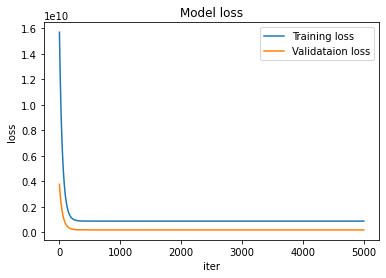

In [6]:
import matplotlib.pyplot as plt

# LR in scratch
slr2 = ScratchLinearRegression(num_iter=5000, lr=0.01, bias=True, verbose=False)
slr2.fit(X_train, y_train, X_test, y_test)

loss = slr2.loss
val_loss = slr2.val_loss

plt.plot(loss, label = 'Training loss')
plt.plot(val_loss, label = 'Validataion loss')
plt.legend()
plt.xlabel ('iter')
plt.ylabel ('loss')
plt.title ('Model loss')
plt.show()

In [9]:
# LR in scratch
slr3 = ScratchLinearRegression(num_iter=100, lr=0.01, bias=False, verbose=True)
slr3.fit(X_train, y_train)
prediction_no_bias = slr3.predict(X_test)

mse_reg_no_bias = mean_squared_error(y_test, prediction_no_bias)
print ("MSE of LR with no bias term: " + str(mse_reg_no_bias))
print ("MSE of LR with with bias term: " + str(mse_reg_scratch))

0回目の学習の損失は15676927976.770891
1回目の学習の損失は15636379279.77125
2回目の学習の損失は15596811593.688696
3回目の学習の損失は15558201121.336813
4回目の学習の損失は15520524643.778606
5回目の学習の損失は15483759506.260363
6回目の学習の損失は15447883604.487928
7回目の学習の損失は15412875371.237053
8回目の学習の損失は15378713763.289627
9回目の学習の損失は15345378248.68795
10回目の学習の損失は15312848794.299202
11回目の学習の損失は15281105853.682644
12回目の学習の損失は15250130355.2521
13回目の学習の損失は15219903690.72659
14回目の学習の損失は15190407703.86207
15回目の学習の損失は15161624679.457422
16回目の学習の損失は15133537332.62805
17回目の学習の損失は15106128798.340546
18回目の学習の損失は15079382621.202034
19回目の学習の損失は15053282745.498085
20回目の学習の損失は15027813505.473042
21回目の学習の損失は15002959615.846914
22回目の学習の損失は14978706162.563078
23回目の学習の損失は14955038593.761135
24回目の学習の損失は14931942710.969482
25回目の学習の損失は14909404660.512224
26回目の学習の損失は14887410925.125177
27回目の学習の損失は14865948315.775936
28回目の学習の損失は14845003963.683027
29回目の学習の損失は14824565312.52921
30回目の学習の損失は14804620110.86433
31回目の学習の損失は14785156404.693026
32回目の学習の損失は14766162530.242792
33回目の学習の損失は14747627106.908062

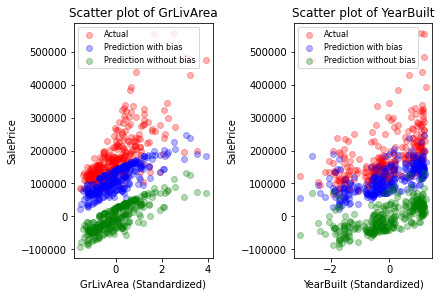

In [11]:
#visualization actual SalePrice vs with bias prediction and no bias prediction
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True)
ax1.scatter(X_test[:,0], y_test, color='red', alpha=0.3, label= 'Actual')
ax1.scatter(X_test[:,0], prediction_reg_scratch, color='blue', alpha=0.3, label = 'Prediction with bias')
ax1.scatter(X_test[:,0], prediction_no_bias, color='green', alpha=0.3, label = 'Prediction without bias')
ax1.set_xlabel('GrLivArea (Standardized)')
ax1.set_ylabel('SalePrice')
ax1.set_title('Scatter plot of GrLivArea')
ax1.legend(loc=2, prop={'size': 8})

ax2.scatter(X_test[:,1], y_test, color='red', alpha=0.3, label= 'Actual')
ax2.scatter(X_test[:,1], prediction_reg_scratch, color='blue', alpha=0.3, label = 'Prediction with bias')
ax2.scatter(X_test[:,1], prediction_no_bias, color='green', alpha=0.3, label = 'Prediction without bias')
ax2.set_xlabel('YearBuilt (Standardized)')
ax2.set_ylabel('SalePrice')
ax2.set_title('Scatter plot of YearBuilt')
ax2.legend(loc=2, prop={'size': 8})
plt.show()


**[Problem 9] (Advance task) Multidimensional feature quantity**

In [12]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt', 'MSSubClass', 'LotArea']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
scaler.fit(X_train)
#transform both X_train and X_test
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

#LR in scratch
reg_scratch = ScratchLinearRegression(num_iter=1000, lr=0.01, bias=True, verbose=False)
reg_scratch.fit(X_train, y_train)
prediction_reg_scratch = reg_scratch.predict(X_test)

# LR in scikit-learn
reg = LinearRegression().fit(X_train, y_train)
prediction_reg = reg.predict(X_test)

# Evaluation using MSE
mse_reg_scratch = mean_squared_error(y_test, prediction_reg_scratch)
print ("MSE of ScratchLR: " + str(mse_reg_scratch))

mse_reg = mean_squared_error(y_test, prediction_reg)
print ("MSE of LR: " + str(mse_reg))

print ('MSE is reduced')

MSE of ScratchLR: 2099006048.9801762
MSE of LR: 2099102500.3344262
MSE is reduced.
